<a href="https://colab.research.google.com/github/dmoste/DATA608/blob/master/dmoste_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
import pandas as pd
ny = pd.read_csv(io.BytesIO(uploaded['pluto_20v8.csv']),low_memory = False)

In [ ]:
import numpy as np
ny = ny[(ny['yearbuilt'] > 1850) & (ny['yearbuilt'] < 2020) & (ny['numfloors'] != 0)]
ny.astype({'yearbuilt': 'int32'})

buildings = {}
for year in range(1850,2021):
  buildings[year] = {}
  df = ny[ny['yearbuilt'] == year]
  for index, building in df.iterrows():
    floors = building['numfloors']
    if floors not in buildings[year].keys():
      buildings[year][floors] = 1
    else:
      buildings[year][floors] += 1

In [ ]:
records = {'year':[],
           'floors':[],
           'observations':[]}
for year in buildings.keys():
  for floors in buildings[year].keys():
    records['year'].append(year)
    records['floors'].append(floors)
    observations = np.log(buildings[year][floors])
    records['observations'].append(observations)

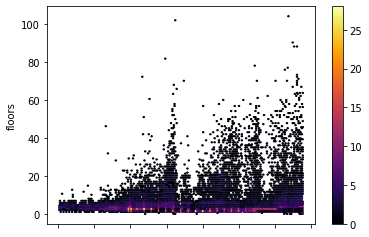

In [85]:
df = pd.DataFrame(records)
ax = df.plot.hexbin(x='year',
                    y='floors',
                    C='observations',
                    reduce_C_function=np.sum,
                    gridsize=170,
                    cmap="inferno")



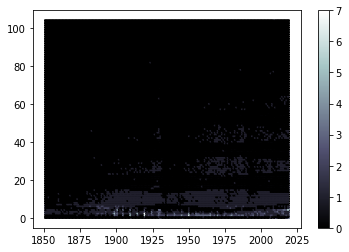

In [95]:
import matplotlib.pyplot as plt
plt.hexbin(records['year'],
           records['floors'],
           gridsize=(170,110),
           cmap=plt.cm.bone)
plt.colorbar()
plt.show()
